<a href="https://colab.research.google.com/github/joyjixu/qm2_resources/blob/main/analyzing_covid_tweets_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import Counter
%matplotlib inline

In [ ]:
df_00to05 = pd.read_csv('/content/coronavirus_tweets_us_04_01_00to05.csv',engine='python', encoding='utf8')
df_06 = pd.read_csv('/content/coronavirus_tweets_us_04_01_06.csv',engine='python', encoding='utf8')
df_07 = pd.read_csv('/content/coronavirus_tweets_us_04_01_07.csv',engine='python', encoding='utf8')
df_08 = pd.read_csv('/content/coronavirus_tweets_us_04_01_08.csv',engine='python', encoding='utf8')
df_09 = pd.read_csv('/content/coronavirus_tweets_us_04_01_09.csv',engine='python', encoding='utf8')
df_10 = pd.read_csv('/content/coronavirus_tweets_us_04_01_10.csv',engine='python', encoding='utf8')
df_11 = pd.read_csv('/content/coronavirus_tweets_us_04_01_11.csv',engine='python', encoding='utf8')
df_12 = pd.read_csv('/content/coronavirus_tweets_us_04_01_12.csv',engine='python', encoding='utf8')
df_13 = pd.read_csv('/content/coronavirus_tweets_us_04_01_13.csv',engine='python', encoding='utf8')
df_14 = pd.read_csv('/content/coronavirus_tweets_us_04_01_14.csv',engine='python', encoding='utf8')
df_15 = pd.read_csv('/content/coronavirus_tweets_us_04_01_15.csv',engine='python', encoding='utf8')
df_16 = pd.read_csv('/content/coronavirus_tweets_us_04_01_16.csv',engine='python', encoding='utf8')
df_17 = pd.read_csv('/content/coronavirus_tweets_us_04_01_17.csv',engine='python', encoding='utf8')
df_18 = pd.read_csv('/content/coronavirus_tweets_us_04_01_18.csv',engine='python', encoding='utf8')
df_19 = pd.read_csv('/content/coronavirus_tweets_us_04_01_19.csv',engine='python', encoding='utf8')
df_20 = pd.read_csv('/content/coronavirus_tweets_us_04_01_20.csv',engine='python', encoding='utf8')
df_21 = pd.read_csv('/content/coronavirus_tweets_us_04_01_21.csv',engine='python', encoding='utf8')
df_22 = pd.read_csv('/content/coronavirus_tweets_us_04_01_22.csv',engine='python', encoding='utf8')
df_23 = pd.read_csv('/content/coronavirus_tweets_us_04_01_23.csv',engine='python', encoding='utf8')

df = pd.concat([df_00to05, df_06, df_07, df_08, df_09, df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17, df_18, df_19, df_20, df_21, df_22, df_23], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63243 entries, 0 to 63242
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   coordinates                 43 non-null     object 
 1   created_at                  63243 non-null  object 
 2   hashtags                    10853 non-null  object 
 3   media                       3447 non-null   object 
 4   urls                        16149 non-null  object 
 5   favorite_count              63243 non-null  object 
 6   id                          63243 non-null  object 
 7   in_reply_to_screen_name     4259 non-null   object 
 8   in_reply_to_status_id       3631 non-null   float64
 9   in_reply_to_user_id         4256 non-null   float64
 10  lang                        63243 non-null  object 
 11  place                       685 non-null    object 
 12  possibly_sensitive          18240 non-null  object 
 13  retweet_count               632

In [ ]:
df.text

0        SCARY—8 new strains now: Johnson &amp; Johnson...
1        RT @LizzyBrock: @miarussostern @Apple @Northwe...
2        RT @lekwilliams: "Lirio Tigre de #Bangkok ", L...
3        RT @mmpadellan: When this is all over, and it ...
4        RT @scrowder: LAST WEEK: Trump mocked for sugg...
                               ...                        
63238    RT @dfriedman33: Sen. Kelly Loeffler sold more...
63239    RT @RealJamesWoods: And so loony liberals ridi...
63240    RT @realTuckFrumper: Georgia Senator Traveled ...
63241    RT @John_Pijanowski: I want to tell you about ...
63242    @davestewart4444 IM SOCIAL DISTANCING FROM THI...
Name: text, Length: 63243, dtype: object

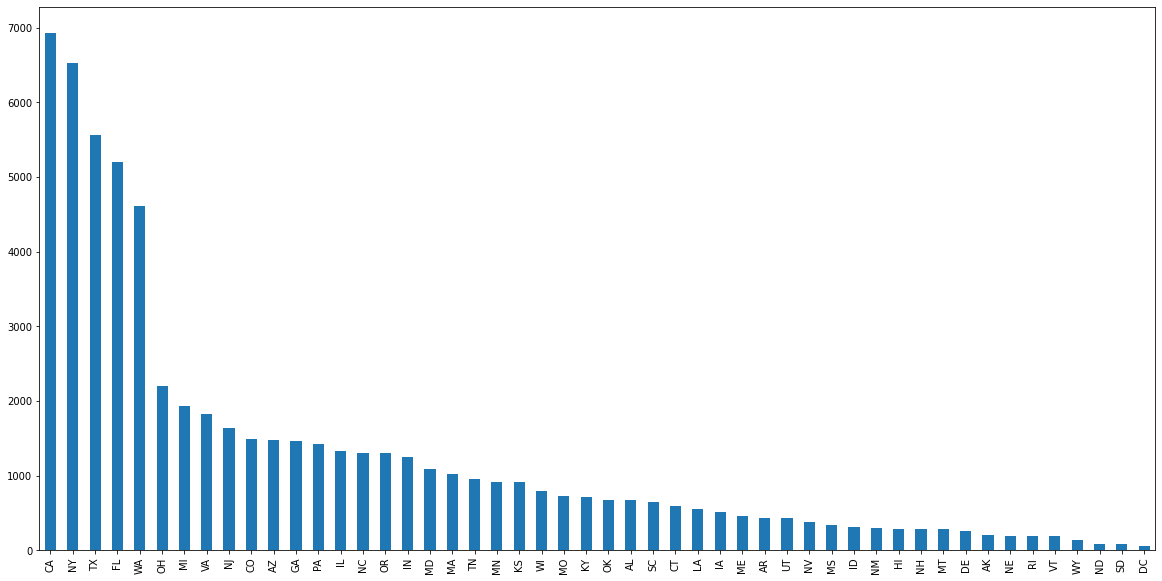

In [ ]:
plt.figure(figsize= [20,10])
df.state.value_counts().plot.bar()

In [ ]:
def find_hour(time):
  hour = re.search('\s\d\d:', time)
  if hour is not None:
    hour = hour.group().strip(': ')

  return hour

In [ ]:
df['hour'] = df.apply(lambda row: find_hour(row['created_at']), axis=1)

In [ ]:
df.tail(20)

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,lang,place,possibly_sensitive,retweet_count,retweet_id,retweet_screen_name,source,text,tweet_url,user_created_at,user_screen_name,user_default_profile_image,user_description,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name.1,user_statuses_count,user_time_zone,user_urls,user_verified,is_state,state,hour
63223,NaN,Wed Apr 01 23:45:45 +0000 2020,NaN,NaN,https://go.shr.lc/3aLh4TP,0,1245497612268003328,NaN,NaN,NaN,en,NaN,False,0,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","'Fanatical Cruelty': As Pandemic Rages, Trump ...",https://twitter.com/taichinow/status/124549761...,Sun Jun 21 00:29:29 +0000 2009,taichinow,False,Lorraine Kirk Ph.D. Cult. Anthropology; Africa...,69.0,1169.0,2910.0,99.0,"Boulder, Colorado",taichinow,taichinow,145565.0,NaN,NaN,False,True,CO,23
63224,NaN,Wed Apr 01 23:45:43 +0000 2020,COVID19,NaN,NaN,0,1245497604240220165,NaN,NaN,NaN,en,NaN,NaN,2,1.245485e+18,lisamightydavis,"<a href=""http://twitter.com/download/iphone"" r...",RT @lisamightydavis: This from the guy with th...,https://twitter.com/legend_zog/status/12454976...,Sat Jun 15 23:46:42 +0000 2019,legend_zog,False,#Bitcoin #Łitecoin #DGB #Ada #Cro https://t.co...,35478.0,2075.0,823.0,7.0,"New Jersey, USA",The_Legend_Of_Lord_Zog,legend_zog,9284.0,NaN,http://litecoin.org,False,True,NJ,23
63225,NaN,Wed Apr 01 23:45:43 +0000 2020,NaN,NaN,NaN,0,1245497603988619266,NaN,NaN,NaN,en,NaN,NaN,38,1.245483e+18,75otingocni,"<a href=""http://twitter.com/download/iphone"" r...",RT @75otingocni: The Chinese Communist Party C...,https://twitter.com/LaraPatriot/status/1245497...,Fri Jun 08 13:49:53 +0000 2018,LaraPatriot,False,"US Military Mom, Daughter & Granddaughter. GOP...",160197.0,41883.0,39772.0,13.0,"Texas, USA",LaraPatriot ⭐️⭐️⭐️🇺🇸👍 🇮🇱,LaraPatriot,200908.0,NaN,http://www.magadragtheinterstate.com,False,True,TX,23
63226,NaN,Wed Apr 01 23:45:45 +0000 2020,IntrovertUtopia QuarantineLife,https://twitter.com/kmc1230/status/12454976115...,NaN,1,1245497611500519425,NaN,NaN,NaN,en,NaN,False,0,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",B00M! Finished all three storylines in Shadow ...,https://twitter.com/kmc1230/status/12454976115...,Sat Nov 22 22:11:42 +0000 2008,kmc1230,False,In love with @JulieLynC. Fresh memes served he...,1980.0,3711.0,1768.0,2.0,Democratic People's Republic of Chicago (aka a...,Keith,kmc1230,34725.0,NaN,NaN,False,True,IL,23
63227,NaN,Wed Apr 01 23:45:43 +0000 2020,NaN,NaN,NaN,0,1245497604076691457,NaN,NaN,NaN,en,NaN,NaN,224,1.245424e+18,ChristopherJM,"<a href=""http://twitter.com/download/android"" ...",RT @ChristopherJM: An American has been stuck ...,https://twitter.com/TexasBlue48/status/1245497...,Thu Nov 27 20:10:36 +0000 2008,TexasBlue48,False,Personal chef retired - #Survivor #Biden2020 ...,26834.0,6180.0,6670.0,174.0,"Texas, USA",🎩💙 Biden/2020 NEVER EVER TRUMP,TexasBlue48,229741.0,NaN,NaN,False,True,TX,23
63228,NaN,Wed Apr 01 23:45:44 +0000 2020,NaN,NaN,NaN,0,1245497608807776257,NaN,NaN,NaN,en,NaN,NaN,8643,1.245448e+18,John_Pijanowski,"<a href=""http://twitter.com/download/android"" ...",RT @John_Pijanowski: I want to tell you about ...,https://twitter.com/SunnyHamrick/status/124549...,Thu Dec 03 01:01:50 +0000 2015,SunnyHamrick,False,Congrats President Biden & VP Harris! \...,357487.0,3332.0,4938.0,14.0,"Florida, USA",sunny willow 🌎,SunnyHamrick,43331.0,NaN,NaN,False,True,FL,23
63229,NaN,Wed Apr 01 23:45:47 +0000 2020,pressrally COVIDー19,NaN,NaN,0,1245497620757245952,NaN,NaN,NaN,fr,NaN,NaN,38,1.245490e+18,IronStache,"<a href=""http://twitter.com/download/android"" ...",RT @IronStache: Mental imagery: Dr.Fauci at a ...,https://twitter.com/SharonJWright1/status/1245...,Fri Mar 23 17:38:28 +0000 2012,SharonJWright1,False,Vote Biden/ Harris 2020 Hate Trump. Love anima...,172230.0,4726.0,3446.0,5.0,"Utah, USA",S

In [ ]:
tweets_per_hour = df.value_counts(subset=['hour'], sort=False) 
tweets_per_hour

hour
00      4675
01      3112
02      4423
03      2650
04      3232
05      2135
06      1228
07      1284
08       739
09      1065
10       985
11      1917
12      2391
13      2148
14      3149
15      2236
16      3421
17      2632
18      3000
19      3504
20      2407
21      3846
22      4151
23      2910
dtype: int64

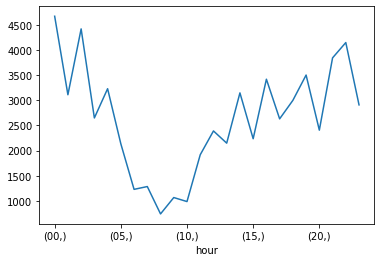

In [ ]:
tweets_per_hour.plot()

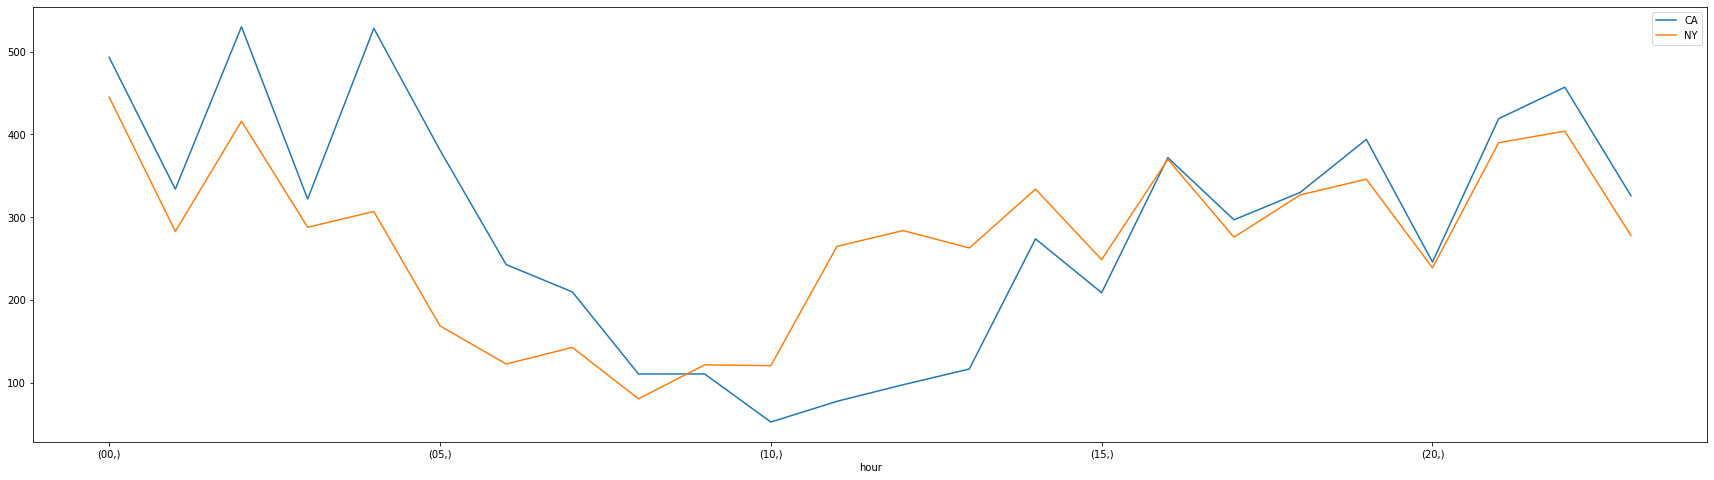

In [ ]:
plt.figure(figsize=(30,8))
ca = df[df['state']=='CA']
ny = df[df['state']=='NY']
ca_per_hour = ca.value_counts(subset=['hour'], sort=False) 
ny_per_hour = ny.value_counts(subset=['hour'], sort=False) 
ax = ca_per_hour.plot(label = 'CA')
ny_per_hour.plot(ax=ax, label = 'NY')
plt.legend()
plt.show()

In [ ]:
!pip install textblob
from textblob import TextBlob

#The polarity score is a float within the range [-1.0, 1.0]. +1 positive, -1 negative
#The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [ ]:
pd.set_option('display.max_colwidth', None)
sample = df.head(200)

def  get_sentiment(string):
  text = TextBlob(string)
  if text.detect_language() != 'en':
    try:
      text = text.translate(to='en')
    except:
      pass
  return text.sentiment

sample['sentiment'] = sample.apply(lambda row : get_sentiment(row['text']), axis = 1)
print(sample[['text','sentiment']])

                                                                                                                                                                                                                                                                                       text                                   sentiment
0    SCARY—8 new strains now: Johnson &amp; Johnson: Says not sure vaccine  works ! Vaccine  for COVID-19; Trump to Supply One Billion Vaccines Worldwide @SpeakerPelosi @NitaLowey @SenSchumer @sfpelosi @AdamSchiff ⁦@USDCCircuitCt⁩ @ChiefJusticeJR @Reuters @AP https://t.co/QjOqvN3lUt  (-0.08806818181818182, 0.6717171717171717)
1                                                                                                                                              RT @LizzyBrock: @miarussostern @Apple @NorthwellHealth Please help @AppleSupport @Apple #covid19 our hospital needs iPads with front facing…                                  (0.0, 0.0)
2               

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [ ]:
sample.to_csv('sample.csv')



---



---





In [ ]:
!pip install nltk==3.3
import nltk
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


     |████████████████████████████████| 1.4MB 13.4MB/s 
  Created wheel for nltk: filename=nltk-3.3-cp36-none-any.whl size=1394468 sha256=217acf4cf19632623cc9748cbad682bc7e31890ffedcd1a8c0a6604b3a6c4977
  Stored in directory: /root/.cache/pip/wheels/d1/ab/40/3bceea46922767e42986aef7606a600538ca80de6062dc266c
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# https://www.digitalocean.com/community/tutorials/how-to-perform-sentiment-analysis-in-python-3-using-the-natural-language-toolkit-nltk

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier

import re, string, random

def remove_noise(tweet_tokens, stop_words = ()):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)



In [ ]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')
text = twitter_samples.strings('tweets.20150430-223406.json')
tweet_tokens = twitter_samples.tokenized('positive_tweets.json')[0]

stop_words = stopwords.words('english')

positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))

all_pos_words = get_all_words(positive_cleaned_tokens_list)

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

positive_dataset = [(tweet_dict, "Positive")
                      for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                      for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

custom_tweet = "I ordered just once from TerribleCo, they screwed up, never used the app again."

custom_tokens = remove_noise(word_tokenize(custom_tweet))

print(custom_tweet, classifier.classify(dict([token, True] for token in custom_tokens)))

[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]
Accuracy is: 0.996
Most Informative Features
                      :) = True           Positi : Negati =   1652.3 : 1.0
                     sad = True           Negati : Positi =     25.9 : 1.0
                follower = True           Positi : Negati =     22.2 : 1.0
                     x15 = True           Negati : Positi =     19.0 : 1.0
                followed = True           Negati : Positi =     17.8 : 1.0
                     bam = True           Positi : Negati =     17.0 : 1.0
               community = True           Positi : Negati =     16.3 : 1.0
                 welcome = True           Positi : Negati =     15.9 : 1.0
                      aw = True           Negati : Positi =     15.0 : 1.0
                    glad = True           Positi : Negati =     13.8 : 1.0
None
I ordered just once from TerribleCo, they screwed 

In [ ]:
def nltk_sentiment(text):
  custom_tokens = remove_noise(word_tokenize(text))
  sentiment = classifier.classify(dict([token, True] for token in custom_tokens))
  return sentiment

In [ ]:
sample['nltk_sentiment'] = sample.apply(lambda row : nltk_sentiment(row['text']), axis = 1)
sample.to_csv('nltk_sample.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#things to do: see number of times trump appears?
#lockdown etc...
#search with ntlk and regex

In [ ]:
covid_cases = pd.read_csv('/content/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
covid_cases.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [ ]:
cases_april = covid_cases[covid_cases['submission_date'].str.match('04/')]
cases_april.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
70,04/01/2020,CO,3342,NaN,NaN,376,NaN,80,NaN,NaN,11,NaN,03/31/2020 04:22:39 PM,Agree,Agree
71,04/02/2020,CO,3728,NaN,NaN,386,NaN,97,NaN,NaN,17,NaN,04/01/2020 04:22:39 PM,Agree,Agree
72,04/03/2020,CO,4173,NaN,NaN,445,NaN,111,NaN,NaN,14,NaN,04/03/2020 04:22:39 PM,Agree,Agree
73,04/04/2020,CO,4565,NaN,NaN,392,NaN,126,NaN,NaN,15,NaN,04/03/2020 04:22:39 PM,Agree,Agree
74,04/05/2020,CO,4950,NaN,NaN,385,NaN,140,NaN,NaN,14,NaN,04/04/2020 04:22:39 PM,Agree,Agree


In [ ]:
state_cases_april = cases_april.groupby(['submission_date','state'], as_index=False).sum()
state_cases_april.head()
new_cases_april = state_cases_april[['submission_date', 'state', 'new_case']]
new_cases_april

,submission_date,state,new_case
0,04/01/2020,AK,10
1,04/01/2020,AL,107
2,04/01/2020,AR,54
3,04/01/2020,AS,0
4,04/01/2020,AZ,124
...,...,...,...
1795,04/30/2020,VT,4
1796,04/30/2020,WA,257
1797,04/30/2020,WI,334
1798,04/30/2020,WV,16


<Figure size 21600x720 with 0 Axes>

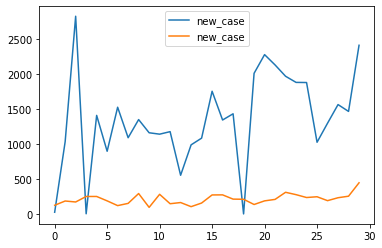

In [ ]:
#let's see california covid vs arizona?
ca_new_cases = new_cases_april[new_cases_april['state'] == 'CA'].drop(['state'], axis = 1).reset_index(drop=True)

az_new_cases = new_cases_april[new_cases_april['state'] == 'AZ'].drop(['state'], axis = 1).reset_index(drop=True)


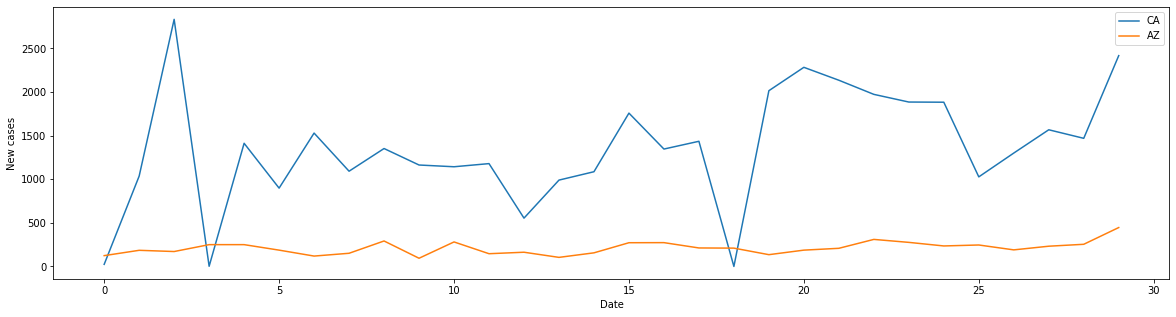

In [ ]:
plt.close('all')

ax = ca_new_cases.plot(label = 'CA', figsize= (20,5))
az_new_cases.plot(ax = ax, label = 'AZ')

plt.ylabel('New cases')
plt.xlabel('Date')
ax.legend(['CA','AZ'])

plt.show()

In [ ]:
tot_cases_april = state_cases_april[['submission_date', 'state', 'tot_cases']]
ca_tot_cases = tot_cases_april[new_cases_april['state'] == 'CA'].drop(['state'], axis = 1).reset_index(drop=True)
az_tot_cases = tot_cases_april[new_cases_april['state'] == 'AZ'].drop(['state'], axis = 1).reset_index(drop=True)
tx_tot_cases = tot_cases_april[new_cases_april['state'] == 'TX'].drop(['state'], axis = 1).reset_index(drop=True)
fl_tot_cases = tot_cases_april[new_cases_april['state'] == 'FL'].drop(['state'], axis = 1).reset_index(drop=True)

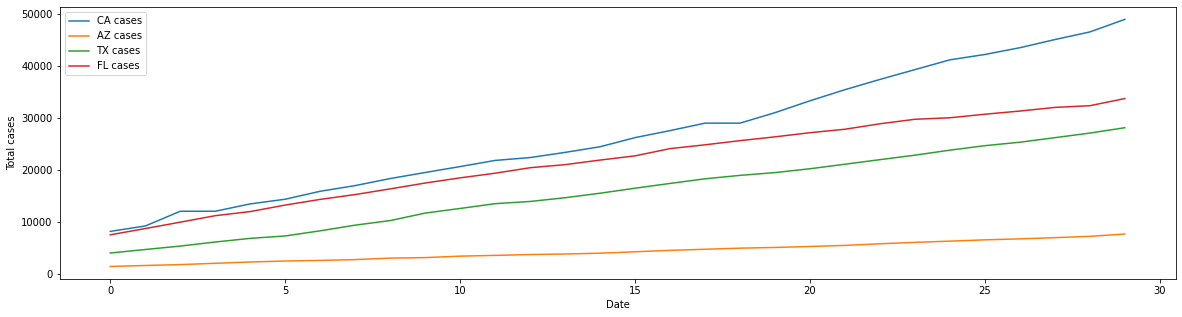

In [ ]:
plt.close('all')

ax = ca_tot_cases.plot(label = 'CA', figsize= (20,5))
az_tot_cases.plot(ax = ax, label = 'AZ')
tx_tot_cases.plot(ax = ax, label = 'TX')
fl_tot_cases.plot(ax = ax, label = 'FL')


plt.ylabel('Total cases')
plt.xlabel('Date')
ax.legend(['CA cases','AZ cases', 'TX cases', 'FL cases'])

plt.show()